In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
users = pd.read_csv('takehome_users.csv', encoding='ISO-8859-1')
users.head(8)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN


Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday
period , identify which factors predict future user
adoption .

In [3]:
engage = pd.read_csv('takehome_user_engagement.csv', encoding='ISO-8859-1')
engage.head(8)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [5]:
engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


Using the user engagement csv file, we need to identify which users logged into the system least 3 times a week on separate days in any given week

In [6]:
type(engage['time_stamp'][0])

str

In [7]:
#Converting time_stamp in datetime format
engage = engage.set_index(pd.DatetimeIndex(engage['time_stamp']))

In [8]:
engage.head()

,time_stamp,user_id,visited
time_stamp,,,
2014-04-22 03:53:30,2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2013-12-25 03:45:04,2,1


In [9]:
#groups by user, then date by week, and sums number of visits per week
eng_grp= engage.groupby('user_id').resample('1W').sum()
#removing the duplicate userid which are NAN
eng_grp = eng_grp[eng_grp['user_id'].isnull()==False].drop('user_id',axis=1)

In [10]:
eng_grp.head(35)

visited
user_id time_stamp         
1       2014-04-27        1
2       2013-11-17        1
        2013-11-24        0
        2013-12-01        1
        2013-12-08        0
        2013-12-15        1
        2013-12-22        0
        2013-12-29        1
        2014-01-05        1
        2014-01-12        1
        2014-01-19        0
        2014-01-26        0
        2014-02-02        0
        2014-02-09        3
        2014-02-16        2
        2014-02-23        0
        2014-03-02        0
        2014-03-09        1
        2014-03-16        1
        2014-03-23        0
        2014-03-30        0
        2014-04-06        1
3       2013-03-24        1
4       2013-05-26        1
5       2013-01-27        1
6       2013-12-22        1
7       2012-12-23        1
10      2013-01-20        1
        2013-01-27        1
        2013-02-03        1
        2013-02-10        2
        2013-02-17        2
        2013-02-24        1
        2013-03-03        3
        2013-03-10        2

In [11]:
# weeks that had less than 3 visits for all users
active_users = eng_grp['visited']>=3
#Groups by users and sums up the number of weeks that had 3 or more visits
active_users = active_users.groupby(level=0).apply(np.sum)
#removes users with no active weeks
active_users = active_users[active_users!=0]
active_users = pd.DataFrame(active_users,index=active_users.index)
active_users.columns = ['Active Weeks']
active_users.head(8)

,Active Weeks
user_id,
2,1
10,52
20,1
33,1
42,68
43,1
53,1
63,62


In [12]:
#Now merging data of active users with the users data
act_user_data = active_users.merge(users,left_index=True,right_on='object_id',how='inner')
act_user_data.head(8)

,Active Weeks,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
1,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
9,52,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0
19,1,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,NaN
32,1,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0
41,68,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN
42,1,43,2012-12-31 07:13:17,Gomes Beatrice,vgqmpljq@yyyxt.com,GUEST_INVITE,1.366010e+09,0,0,63,149.0
52,1,53,2013-02-09 23:47:15,Ribeiro Camila,CamilaGomesRibeiro@gmail.com,GUEST_INVITE,1.367798e+09,0,0,37,3641.0
62,62,63,2012-12-20 16:30:52,Martins Leonor,LeonorAraujoMartins@gmail.com,SIGNUP_GOOGLE_AUTH,1.401899e+09,0,0,203,NaN


In [13]:
# Finding the data on active users and adding Active column to original Data

act_user_data['Active']=1
users['Active']=int(0)
users.iloc[list(act_user_data.index),10]=1
model_data = users.set_index('object_id').sort_index()

model_data.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Active
object_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [14]:
#Removing unnecessary features
model_data = model_data.drop([ 'name', 'email','last_session_creation_time',],axis=1)
date_feature = model_data.pop('creation_time')
model_data.head(8)

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Active
object_id,,,,,,
1,GUEST_INVITE,1,0,11,10803.0,0
2,ORG_INVITE,0,0,1,316.0,1
3,ORG_INVITE,0,0,94,1525.0,0
4,GUEST_INVITE,0,0,1,5151.0,0
5,GUEST_INVITE,0,0,193,5240.0,0
6,GUEST_INVITE,0,0,197,11241.0,0
7,SIGNUP,0,1,37,NaN,0
8,PERSONAL_PROJECTS,1,1,74,NaN,0


In [15]:
#fillining NA values in invited_by_user_id with boolean
model_data['invited_by_user_id'] = model_data['invited_by_user_id'].apply(lambda x: 1 if not np.isnan(x) else 0)
model_data.head(8)

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Active
object_id,,,,,,
1,GUEST_INVITE,1,0,11,1,0
2,ORG_INVITE,0,0,1,1,1
3,ORG_INVITE,0,0,94,1,0
4,GUEST_INVITE,0,0,1,1,0
5,GUEST_INVITE,0,0,193,1,0
6,GUEST_INVITE,0,0,197,1,0
7,SIGNUP,0,1,37,0,0
8,PERSONAL_PROJECTS,1,1,74,0,0


In [16]:
model_data = pd.get_dummies(data=model_data,columns=['creation_source'])

In [17]:
model_data.head(8)

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Active,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
object_id,,,,,,,,,,
1,1,0,11,1,0,1,0,0,0,0
2,0,0,1,1,1,0,1,0,0,0
3,0,0,94,1,0,0,1,0,0,0
4,0,0,1,1,0,1,0,0,0,0
5,0,0,193,1,0,1,0,0,0,0
6,0,0,197,1,0,1,0,0,0,0
7,0,1,37,0,0,0,0,0,1,0
8,1,1,74,0,0,0,0,1,0,0


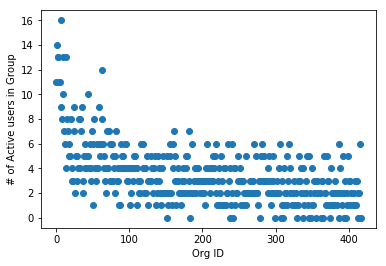

In [18]:
model = model_data.groupby('org_id').sum()
plt.scatter(model.index,model.Active)
plt.ylabel('# of Active users in Group')
plt.xlabel('Org ID')
plt.show()

In [19]:
model1 = []
for i in model_data['org_id']:
    cata = model.loc[i,'Active']
    model1.append(cata)
model_data['org_id'] = model1

model_data = pd.get_dummies(data=model_data,columns=['org_id'])
model_data.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,Active,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_id_0,...,org_id_6,org_id_7,org_id_8,org_id_9,org_id_10,org_id_11,org_id_12,org_id_13,org_id_14,org_id_16
object_id,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 25 columns):
opted_in_to_mailing_list              12000 non-null int64
enabled_for_marketing_drip            12000 non-null int64
invited_by_user_id                    12000 non-null int64
Active                                12000 non-null int64
creation_source_GUEST_INVITE          12000 non-null uint8
creation_source_ORG_INVITE            12000 non-null uint8
creation_source_PERSONAL_PROJECTS     12000 non-null uint8
creation_source_SIGNUP                12000 non-null uint8
creation_source_SIGNUP_GOOGLE_AUTH    12000 non-null uint8
org_id_0                              12000 non-null uint8
org_id_1                              12000 non-null uint8
org_id_2                              12000 non-null uint8
org_id_3                              12000 non-null uint8
org_id_4                              12000 non-null uint8
org_id_5                              12000 non-null uint8
org_id

In [21]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve


In [22]:
y = model_data.pop('Active')
X = model_data


In [24]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25,random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(9000, 24) (9000,)
(3000, 24) (3000,)


#### Trying LogisticRegression

In [25]:
logreg=LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y_pred = logreg.predict(X_test)

In [35]:
accuracy_score(y_test, y_pred)

0.8783333333333333

In [27]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2635    0]
 [ 365    0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2635
           1       0.00      0.00      0.00       365

    accuracy                           0.88      3000
   macro avg       0.44      0.50      0.47      3000
weighted avg       0.77      0.88      0.82      3000



C:\Users\acer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


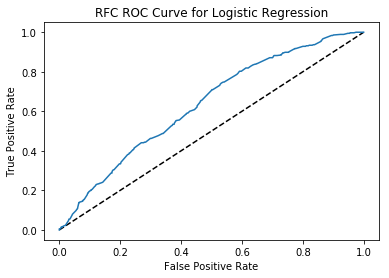

In [28]:
log_pre_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr , thresholds = roc_curve(y_test, log_pre_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label= 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RFC ROC Curve for Logistic Regression')
plt.show()

In [43]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(logreg,X,y,cv=5)
cv_results

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

array([0.87958333, 0.87958333, 0.87958333, 0.87958333, 0.87958333])

In [44]:
np.mean(cv_results)

0.8795833333333334

#### Trying Random Forest

In [30]:
rfc= RandomForestClassifier()
rfc.fit(X_train, y_train)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
rfc_pre= rfc.predict(X_test)

In [32]:
print(confusion_matrix(y_test, rfc_pre))
print(classification_report(y_test, rfc_pre))

[[2618   17]
 [ 363    2]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2635
           1       0.11      0.01      0.01       365

    accuracy                           0.87      3000
   macro avg       0.49      0.50      0.47      3000
weighted avg       0.78      0.87      0.82      3000



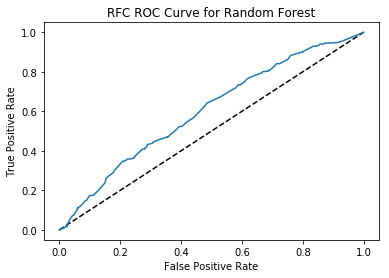

In [33]:
rfc_pre_prob = rfc.predict_proba(X_test)[:,1]
fpr, tpr , thresholds = roc_curve(y_test, rfc_pre_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label= 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RFC ROC Curve for Random Forest')
plt.show()

In [34]:
accuracy_score(y_test, rfc_pre)

0.8733333333333333

In [41]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(rfc,X,y,cv=5)
cv_results

array([0.87625   , 0.8775    , 0.87666667, 0.87833333, 0.87916667])

In [42]:
np.mean(cv_results)

0.8775833333333333

In [50]:
feat_imp_rfc = pd.DataFrame({'Importance':rfc.feature_importances_})    
feat_imp_rfc['Feature'] = X.columns
feat_imp_rfc.sort_values(by='Importance', ascending=True, inplace=True)

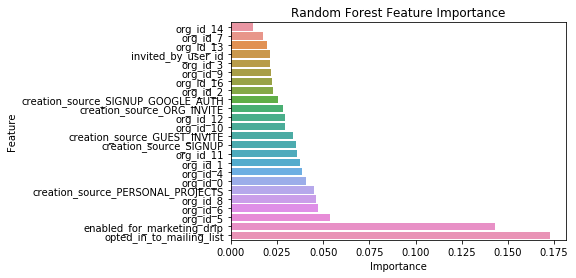

In [51]:
sns.barplot(y="Feature", x="Importance", data=feat_imp_rfc)
plt.title('Random Forest Feature Importance')
plt.show()

In [64]:
features = rfc.feature_importances_
feature_importances = pd.DataFrame(features, index = X.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
opted_in_to_mailing_list,0.172608
enabled_for_marketing_drip,0.142803
org_id_5,0.053675
org_id_6,0.047395
org_id_8,0.045954
creation_source_PERSONAL_PROJECTS,0.045216
org_id_0,0.040701
org_id_4,0.038261
org_id_1,0.037330
org_id_11,0.035916


#### Trying Decision Tree

In [36]:
decision_tree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)

In [37]:
accuracy_score(y_test, decision_tree_pred)

0.8773333333333333

In [38]:
print(confusion_matrix(y_test, decision_tree_pred))
print(classification_report(y_test, decision_tree_pred))

[[2631    4]
 [ 364    1]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      2635
           1       0.20      0.00      0.01       365

    accuracy                           0.88      3000
   macro avg       0.54      0.50      0.47      3000
weighted avg       0.80      0.88      0.82      3000



In [53]:
feat_imp_rfc = pd.DataFrame({'Importance':decision_tree.feature_importances_})    
feat_imp_rfc['Feature'] = X.columns
feat_imp_rfc.sort_values(by='Importance', ascending=True, inplace=True)

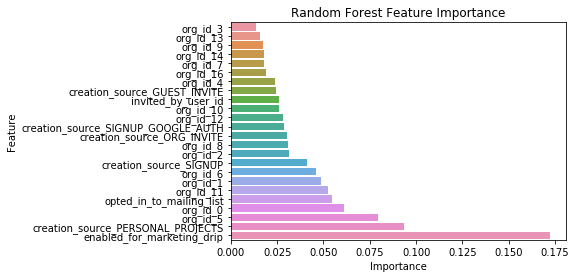

In [54]:
sns.barplot(y="Feature", x="Importance", data=feat_imp_rfc)
plt.title('Random Forest Feature Importance')
plt.show()

We have tried various ML models as Logistic regression, decision tree, random forest and the best accuracy is coming by using 87.9%. Also as checked using the random forest the most important feature are 'opted_in_to_mailing_list' & 'enabled_for_marketing_drip'